In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingRegressor
import numpy as np

In [3]:
df = pd.read_csv("master.csv")

Training a model w/o Regularization

In [4]:
X = df[['Day of Week', 'feelslikemax', 'feelslikemin', 'precip', 'snowdepth', 
            'windgust', 'windspeed', 'solarradiation', 'solarenergy', 
            'uvindex', 'moonphase']]
y = df['count']

X = pd.get_dummies(X)

print(X.dtypes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='count:poisson')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

feelslikemax             float64
feelslikemin             float64
precip                   float64
snowdepth                float64
windgust                 float64
windspeed                float64
solarradiation           float64
solarenergy              float64
uvindex                  float64
moonphase                float64
Day of Week_Friday          bool
Day of Week_Monday          bool
Day of Week_Saturday        bool
Day of Week_Sunday          bool
Day of Week_Thursday        bool
Day of Week_Tuesday         bool
Day of Week_Wednesday       bool
dtype: object
Mean Squared Error: 3.277179847137732


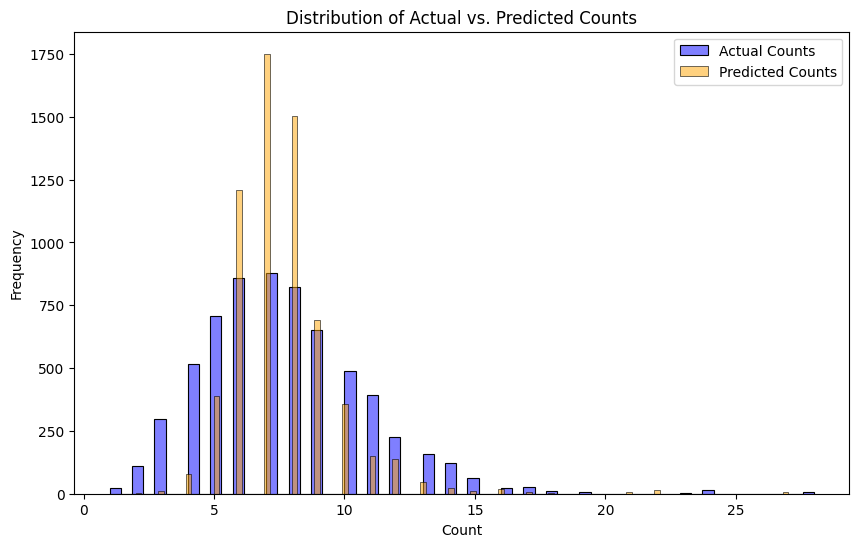

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual Counts')
sns.histplot(y_pred, color='orange', alpha=0.5, label='Predicted Counts')
plt.title('Distribution of Actual vs. Predicted Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

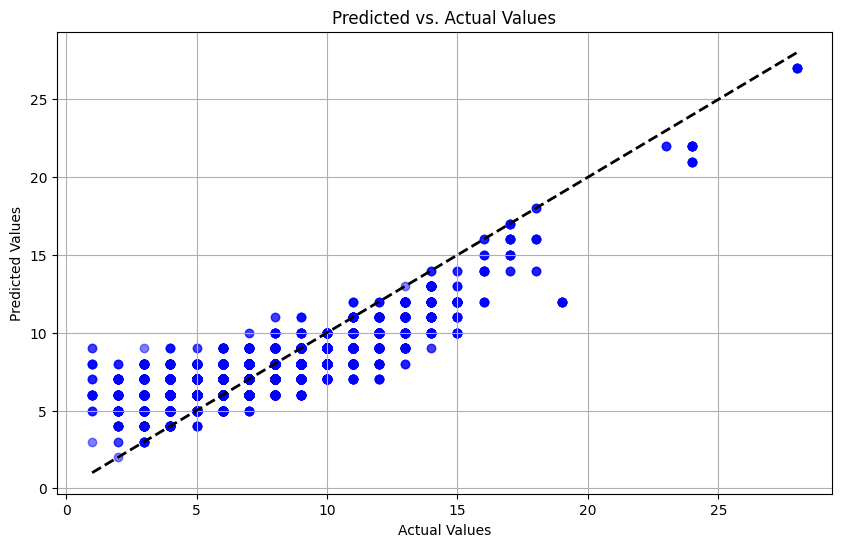

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

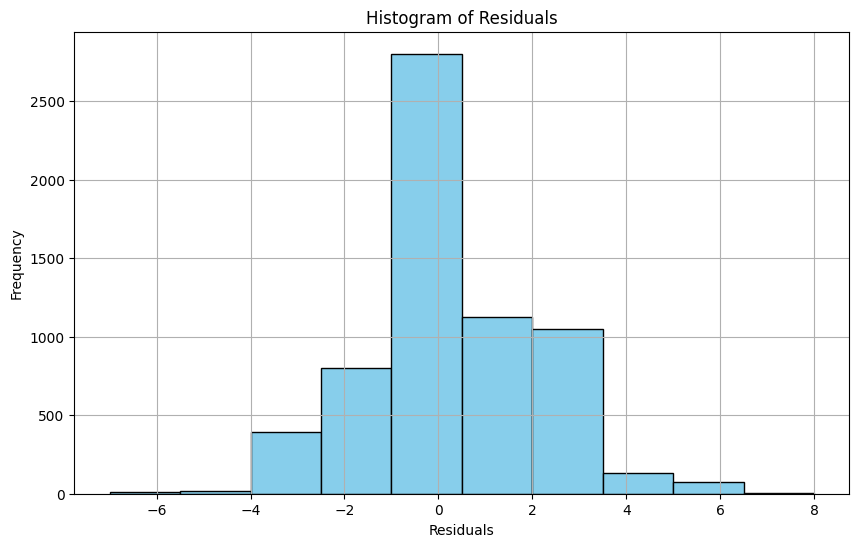

In [40]:
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.hist(residuals, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Training a model w/ Regularization

In [41]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_train)

combined_predictions_train = np.column_stack((lasso_predictions, xgb_model.predict(X_train)))

meta_model = XGBRegressor()
meta_model.fit(combined_predictions_train, y_train)

lasso_predictions_test = lasso_model.predict(X_test)
combined_predictions_test = np.column_stack((lasso_predictions_test, xgb_model.predict(X_test)))
final_predictions = meta_model.predict(combined_predictions_test)

final_predictions = np.round(final_predictions).astype(int)

mse = mean_squared_error(y_test, final_predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.360006239276244


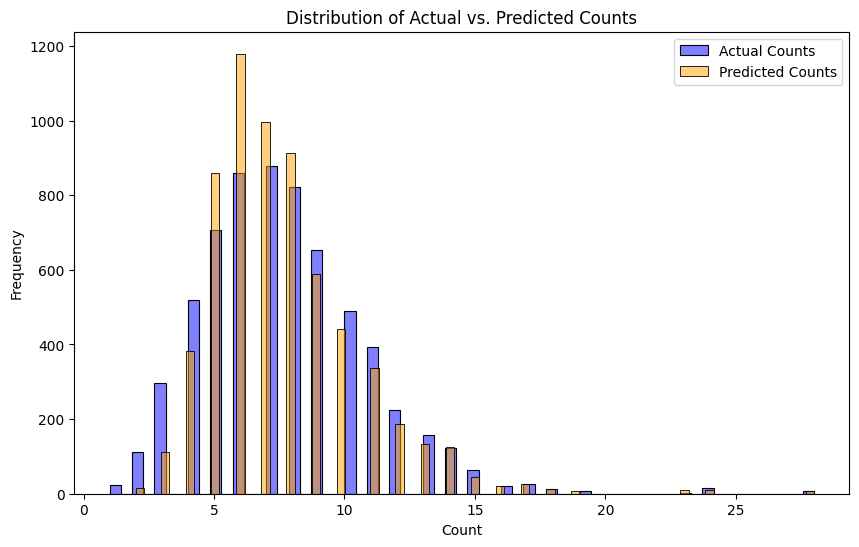

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual Counts')
sns.histplot(final_predictions,color='orange', alpha=0.5, label='Predicted Counts')
plt.title('Distribution of Actual vs. Predicted Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

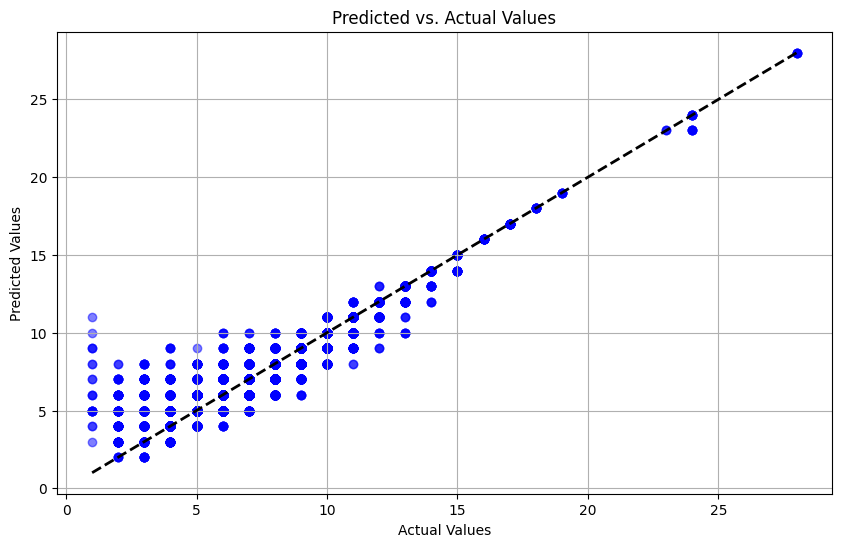

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


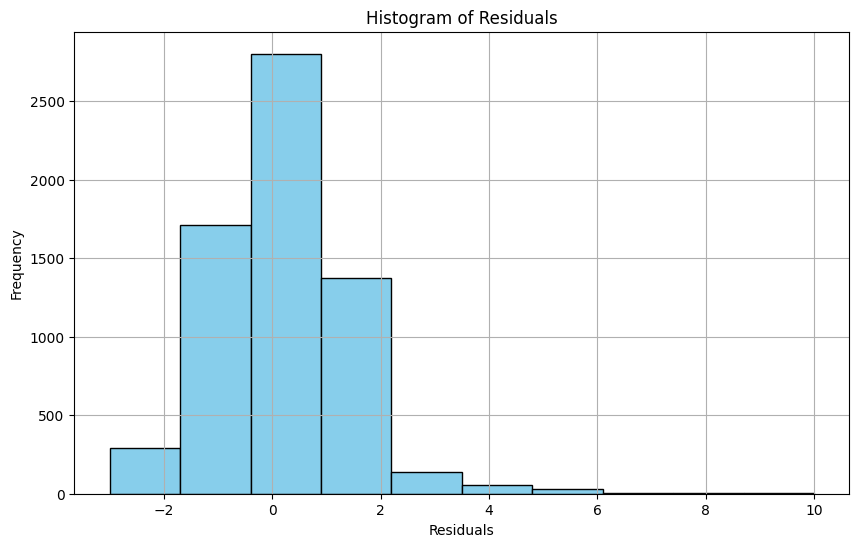

In [44]:
import matplotlib.pyplot as plt

residuals = final_predictions - y_test

plt.figure(figsize=(10, 6))
plt.hist(residuals, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
